In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [66]:
df_train = pd.read_csv(r"../../data/final/07062025/processed_train.csv")
df_test = pd.read_csv(r"../../data/final/07062025/processed_test.csv")

In [67]:
columns_remove = [
    'VitaminD',
    'YearStart',
]

In [68]:
df_train['label'].value_counts()

label
1.0    11234
0.0     6063
2.0      281
Name: count, dtype: int64

In [69]:
df_train.columns

Index(['Gender', 'Age', 'BMI', 'WaistCircumference', 'ALT', 'AST',
       'AlkalinePhosphotase', 'Triglycerides', 'UricAcid', 'Creatinine',
       'HDLCholesterol', 'LDLCholesterol', 'Hemoglobin', 'Hematocrit',
       'MeanCellVolumn', 'MeanCellHemoglobin', 'RedCellDistributionWidth',
       'PlateletCount', 'MeanPlateletVolume', 'Hba1c', 'VitaminD',
       'milk_consumption', 'label', 'YearStart', 'Race_1.0', 'Race_3.0',
       'Race_4.0', 'Race_5.0'],
      dtype='object')

In [70]:
df_train.drop(columns=columns_remove, inplace=True)
df_test.drop(columns=columns_remove, inplace=True)

In [71]:
df_test['label'] = df_test['label'].apply(lambda x: 0 if x == 2 else x)
df_train['label'] = df_train['label'].apply(lambda x: 0 if x == 2 else x)

In [72]:
df_train.columns

Index(['Gender', 'Age', 'BMI', 'WaistCircumference', 'ALT', 'AST',
       'AlkalinePhosphotase', 'Triglycerides', 'UricAcid', 'Creatinine',
       'HDLCholesterol', 'LDLCholesterol', 'Hemoglobin', 'Hematocrit',
       'MeanCellVolumn', 'MeanCellHemoglobin', 'RedCellDistributionWidth',
       'PlateletCount', 'MeanPlateletVolume', 'Hba1c', 'milk_consumption',
       'label', 'Race_1.0', 'Race_3.0', 'Race_4.0', 'Race_5.0'],
      dtype='object')

In [73]:
df_train.iloc[:,:12].describe()

,Gender,Age,BMI,WaistCircumference,ALT,AST,AlkalinePhosphotase,Triglycerides,UricAcid,Creatinine,HDLCholesterol,LDLCholesterol
count,17578.000000,17578.000000,17578.000000,17578.000000,17578.000000,17578.00000,17578.000000,17578.000000,17578.000000,17578.000000,17578.000000,17578.000000
mean,1.518546,40.994652,27.227408,93.703203,22.346001,23.51866,77.961088,111.260781,5.305916,0.842563,53.583172,109.204449
std,0.499670,21.236882,6.021978,15.866301,11.020949,6.47636,38.195252,68.277001,1.324769,0.214893,13.959501,33.720760
min,1.000000,12.000000,13.300000,52.000000,5.000000,7.00000,9.000000,9.000000,1.200000,0.300000,10.000000,17.000000
25%,1.000000,20.000000,22.770000,81.400000,15.000000,19.00000,55.000000,63.000000,4.300000,0.700000,43.000000,85.000000
50%,2.000000,38.500000,26.500000,93.150000,19.000000,22.00000,69.000000,92.000000,5.200000,0.800000,52.000000,106.000000
75%,2.000000,59.000000,30.740000,104.300000,26.000000,26.00000,87.000000,140.000000,6.200000,0.990000,62.000000,131.000000
max,2.000000,85.000000,48.220000,142.900000,103.000000,55.00000,267.000000,441.000000,9.500000,2.000000,99.000000,216.000000


In [74]:
df_train = df_train[df_train['milk_consumption']<=3]
df_test = df_test[df_test['milk_consumption']<=3]

In [75]:
category_columns = [
    'Gender', 'Race_1.0',
    'Race_3.0', 'Race_4.0',
    'Race_5.0', 'label','milk_consumption'
]

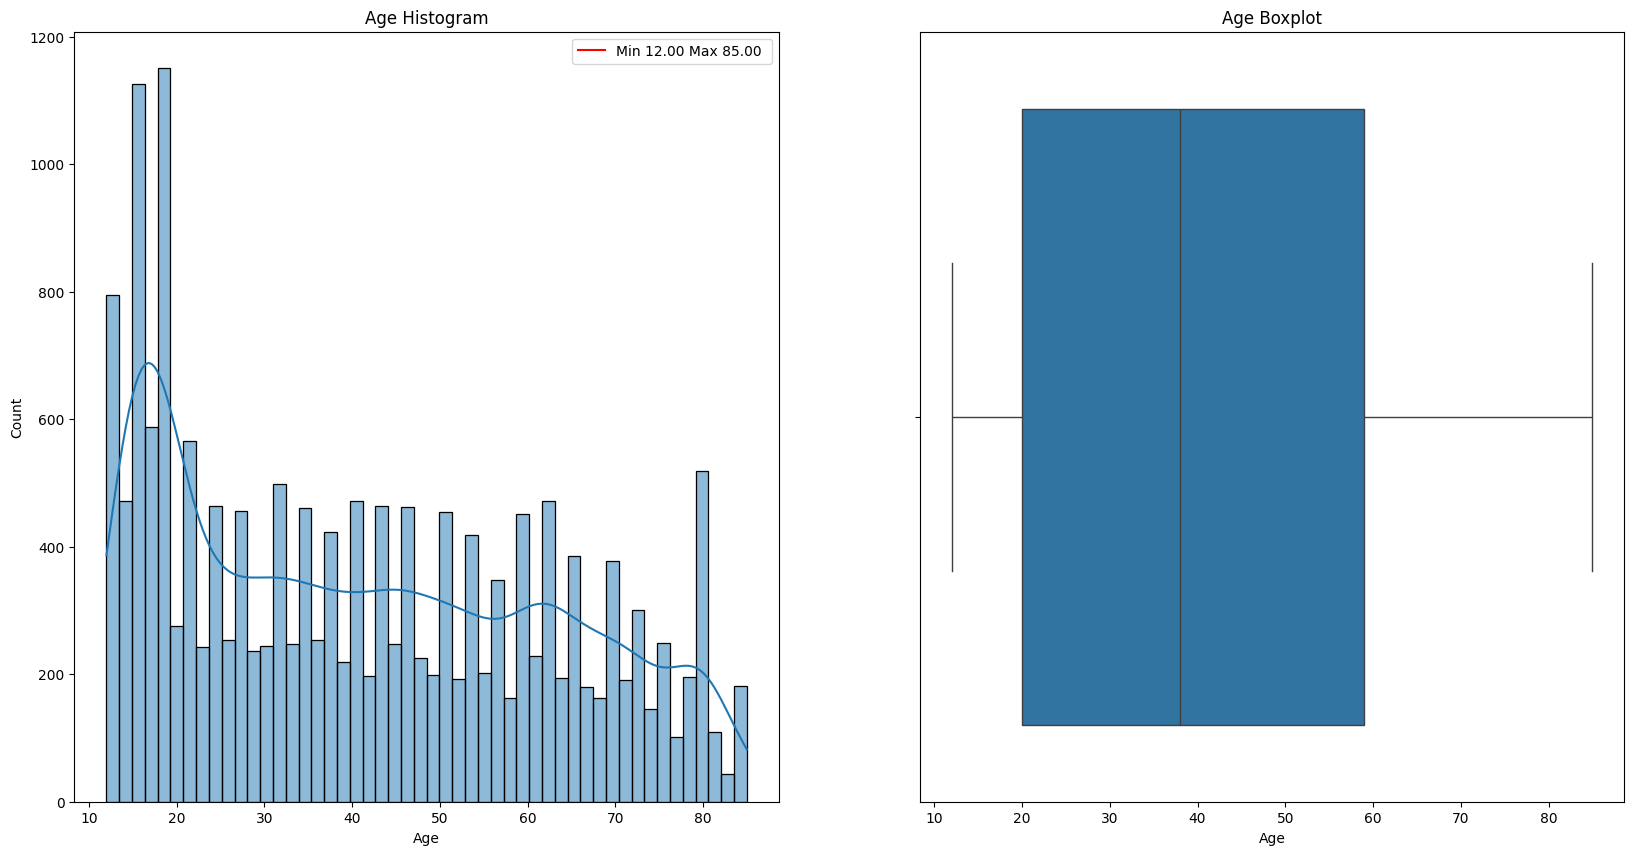

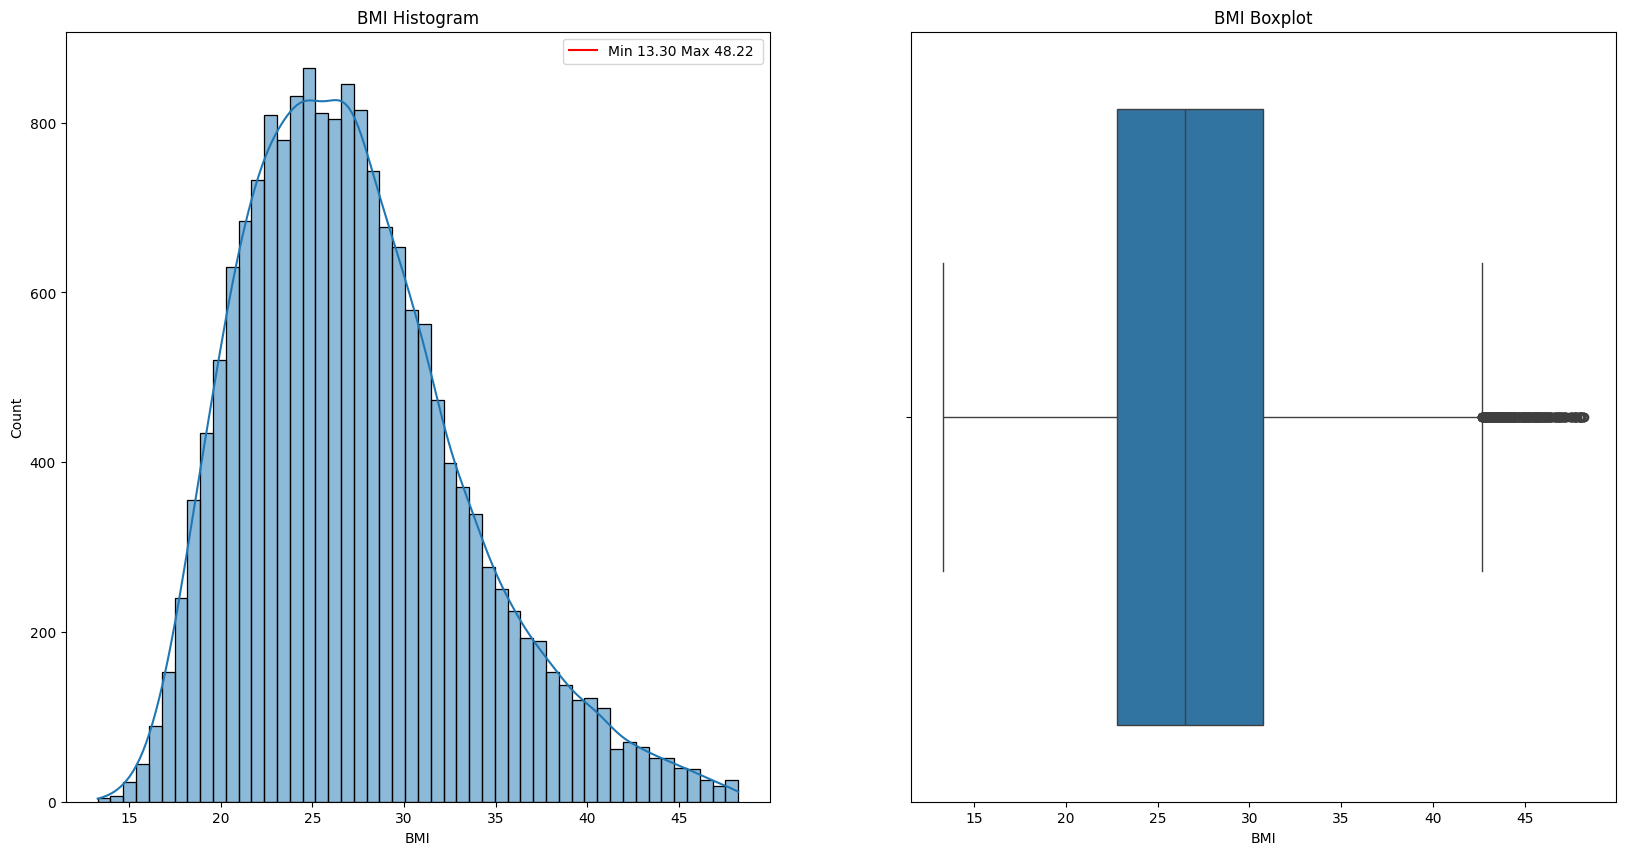

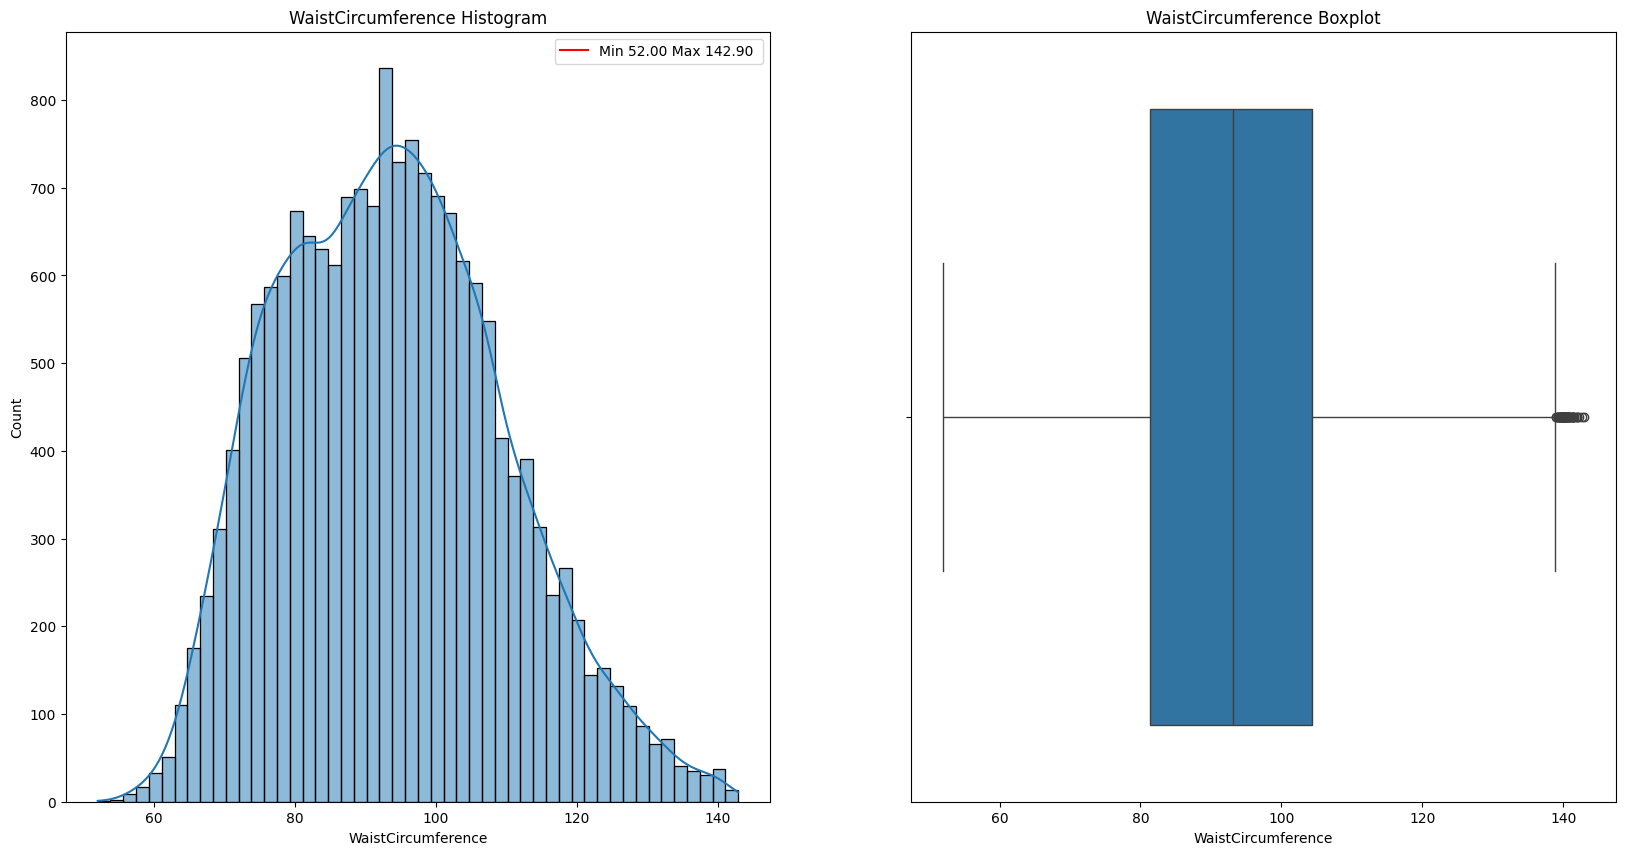

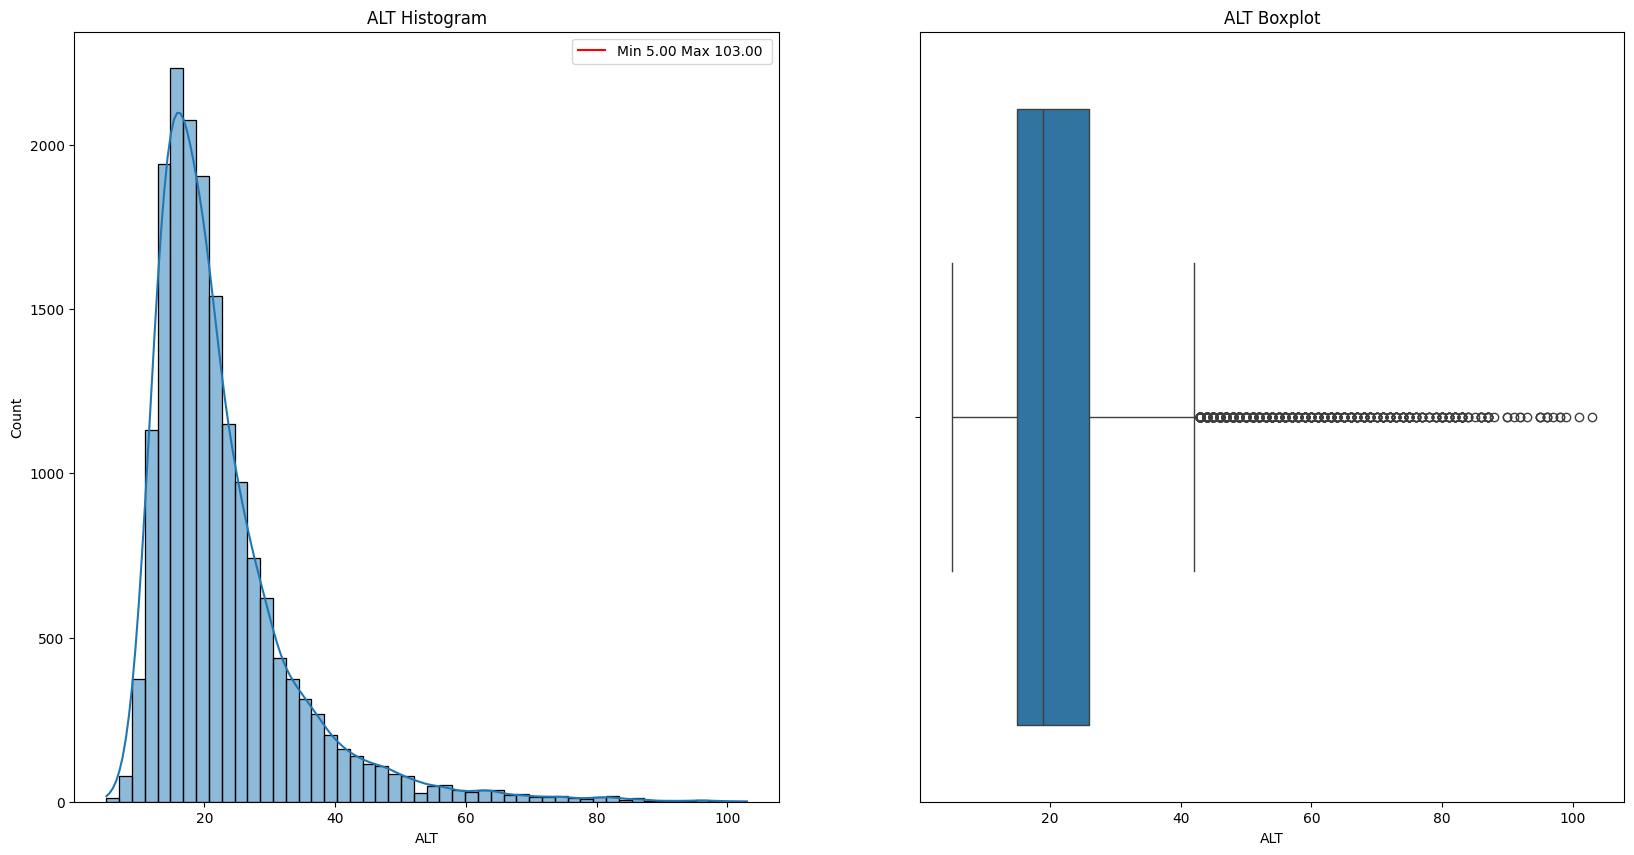

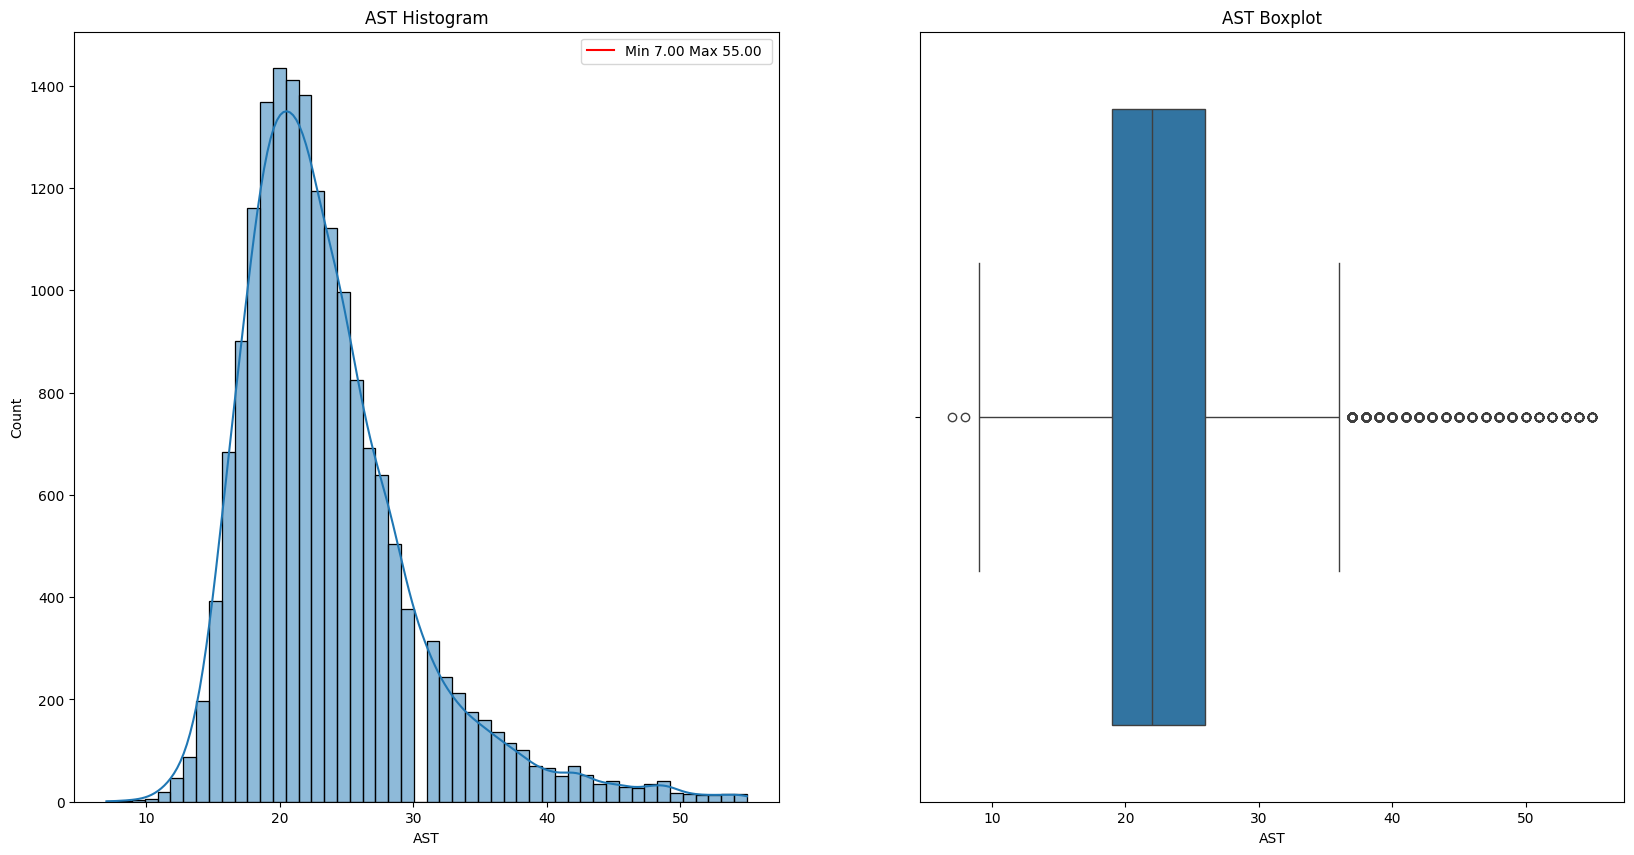

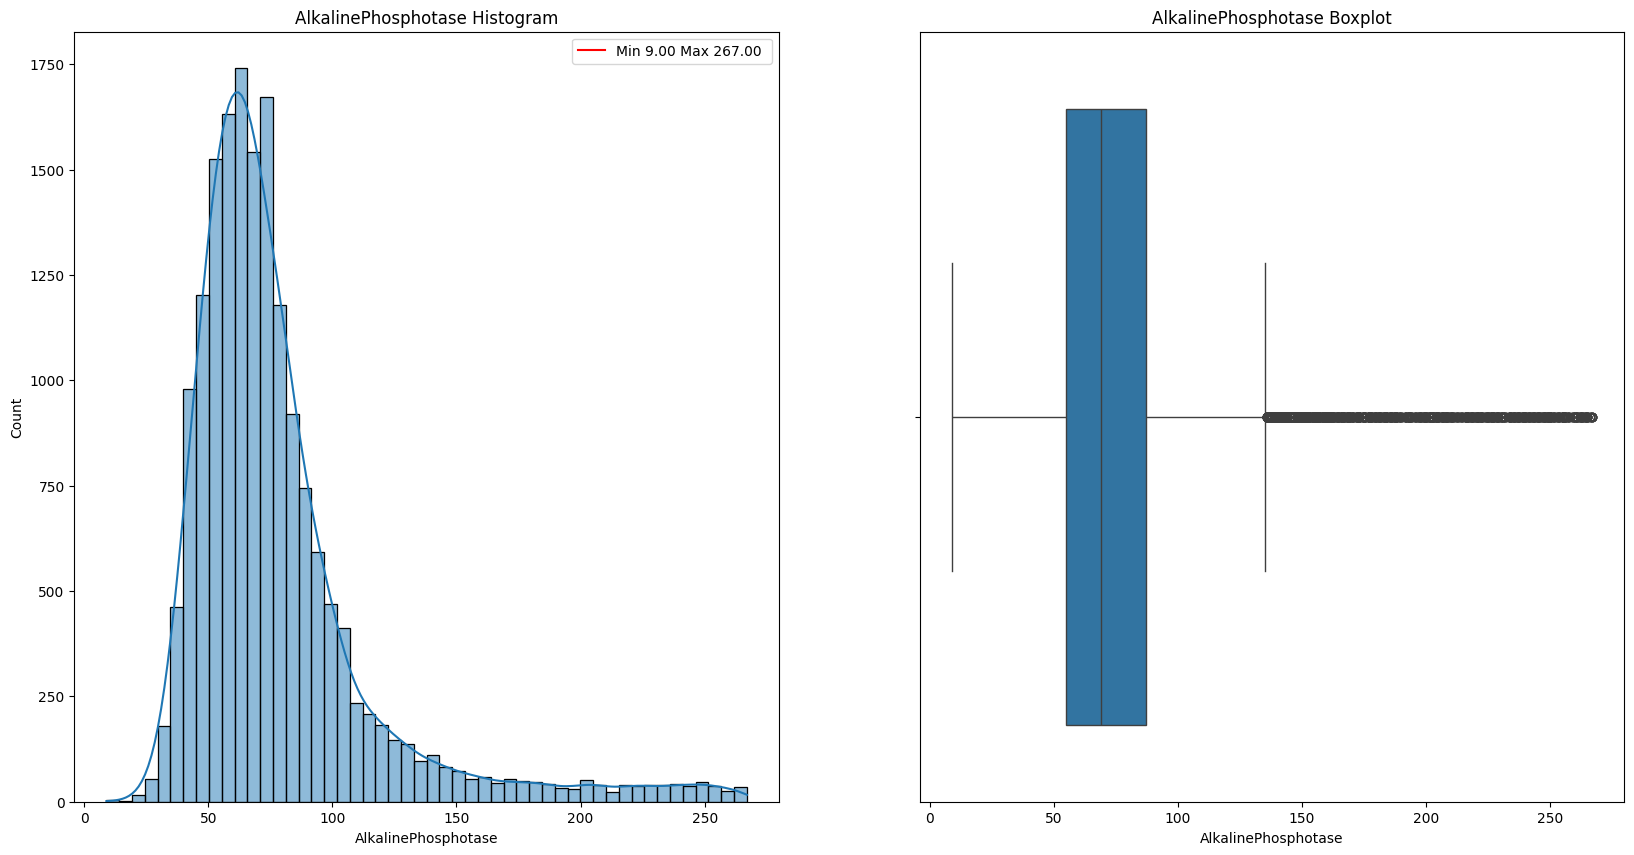

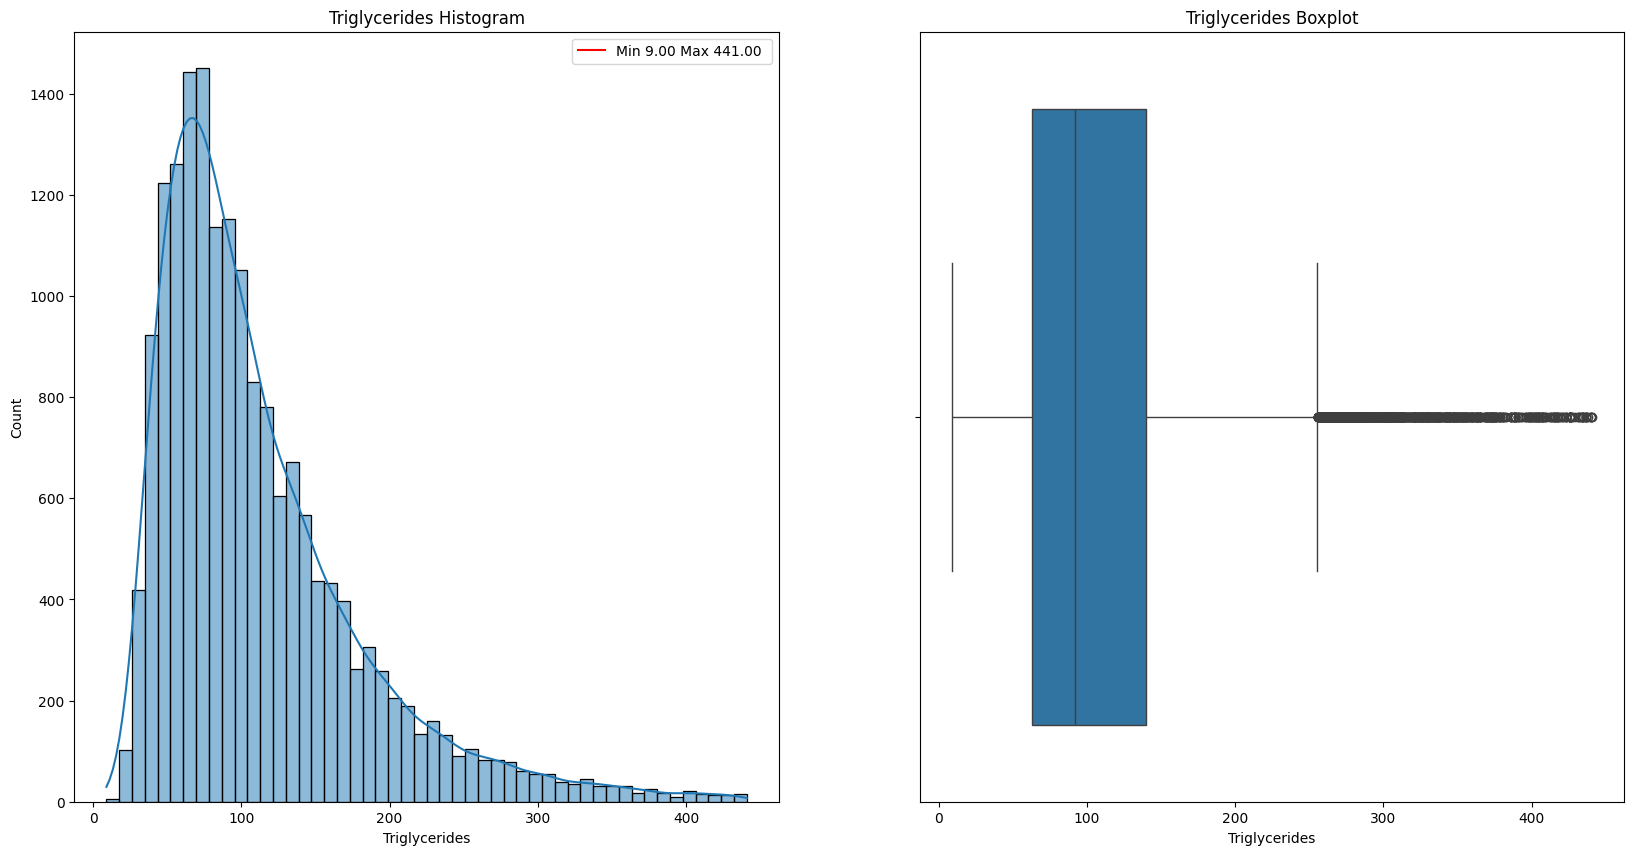

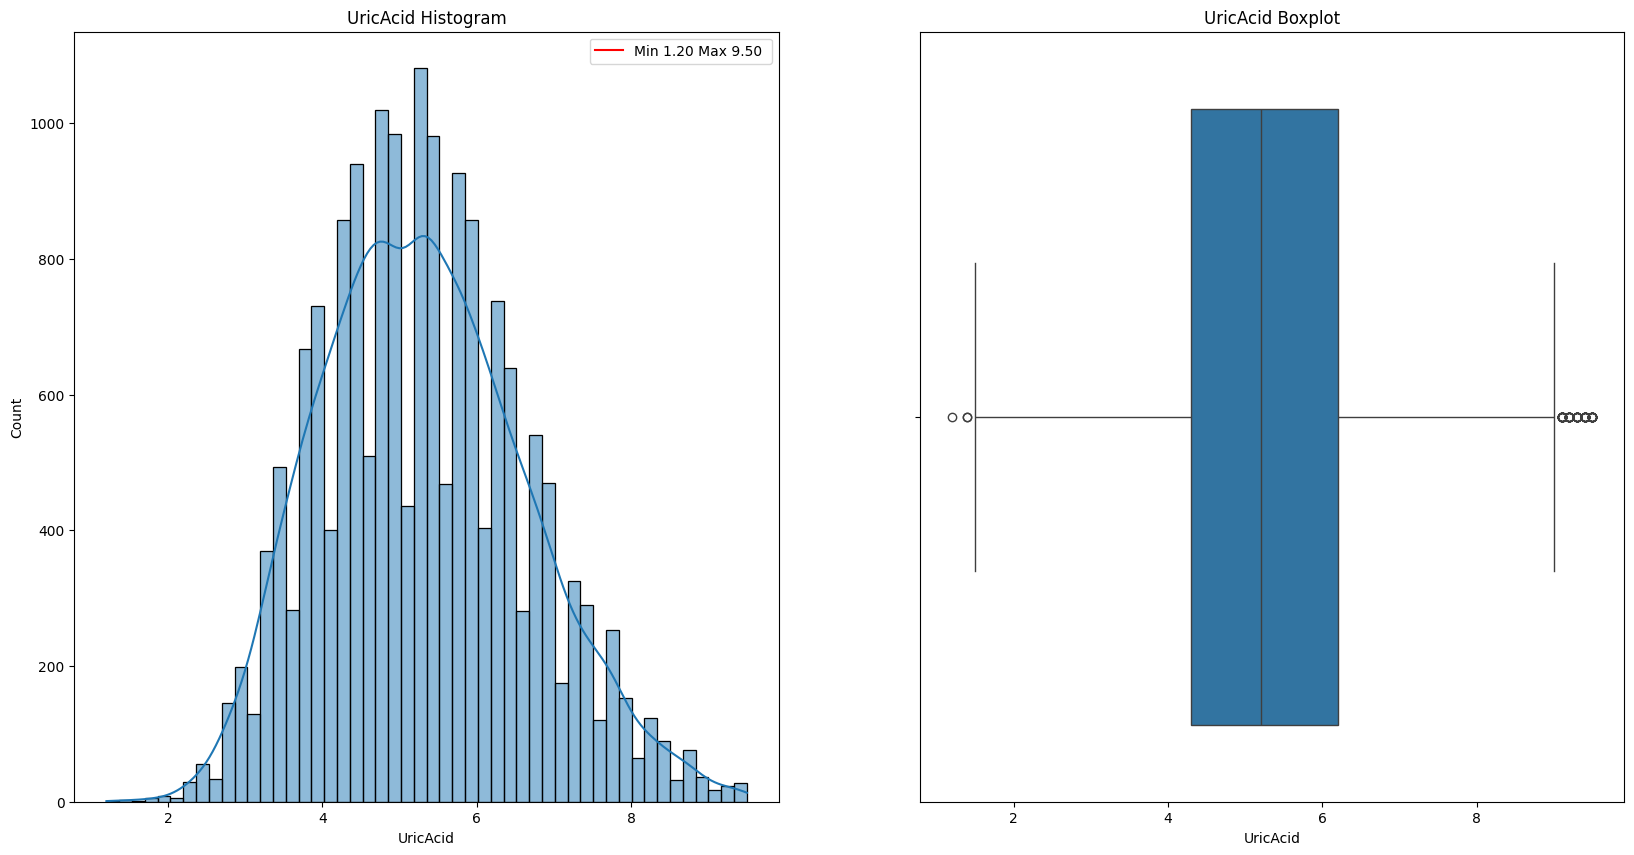

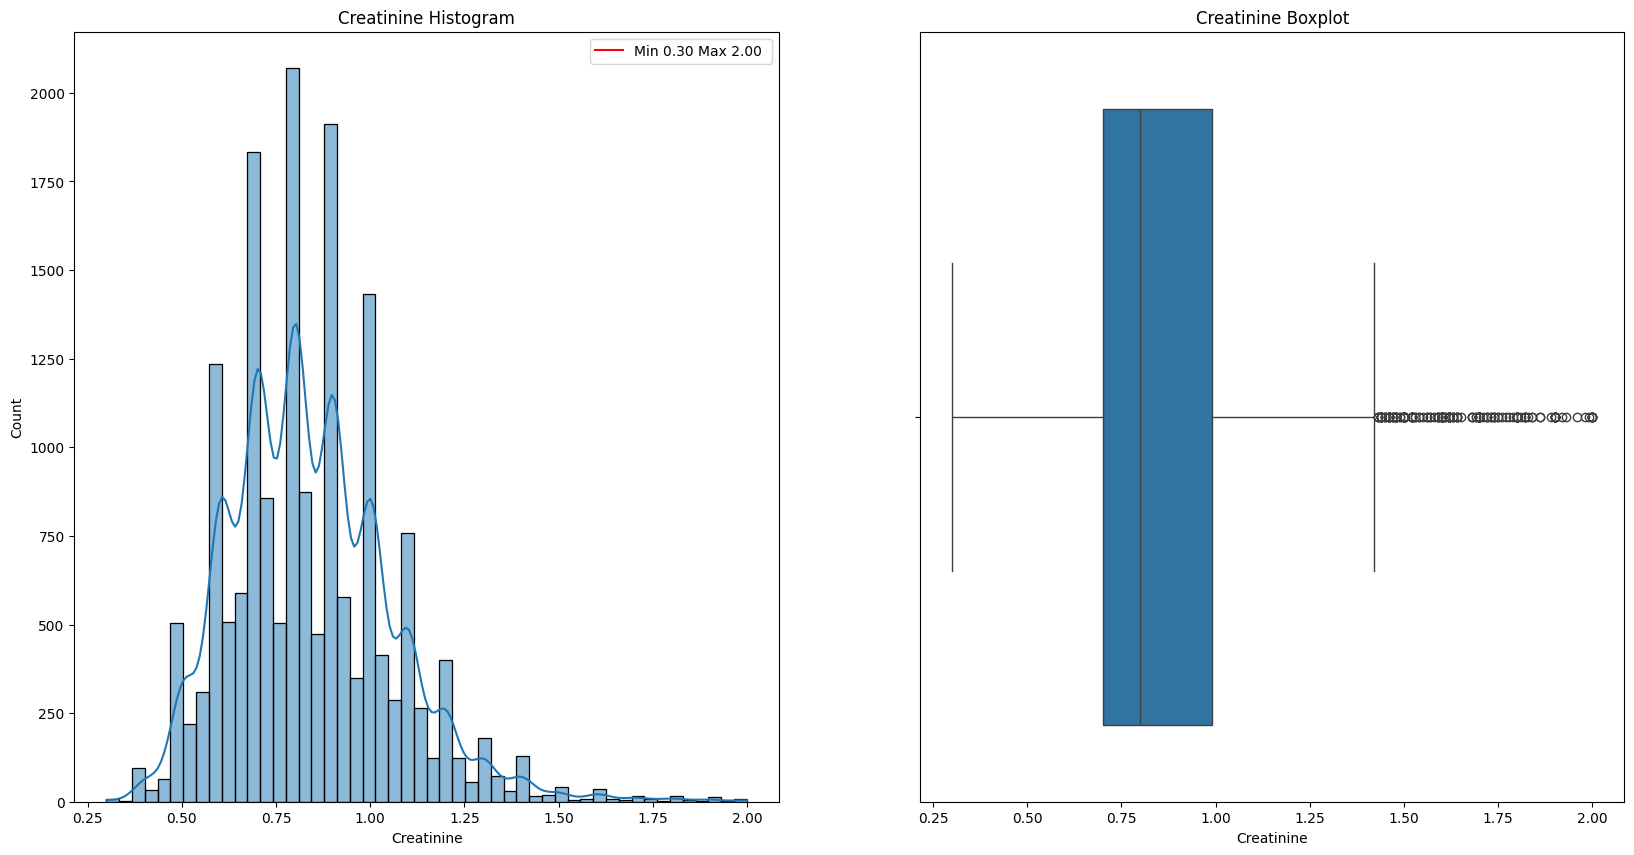

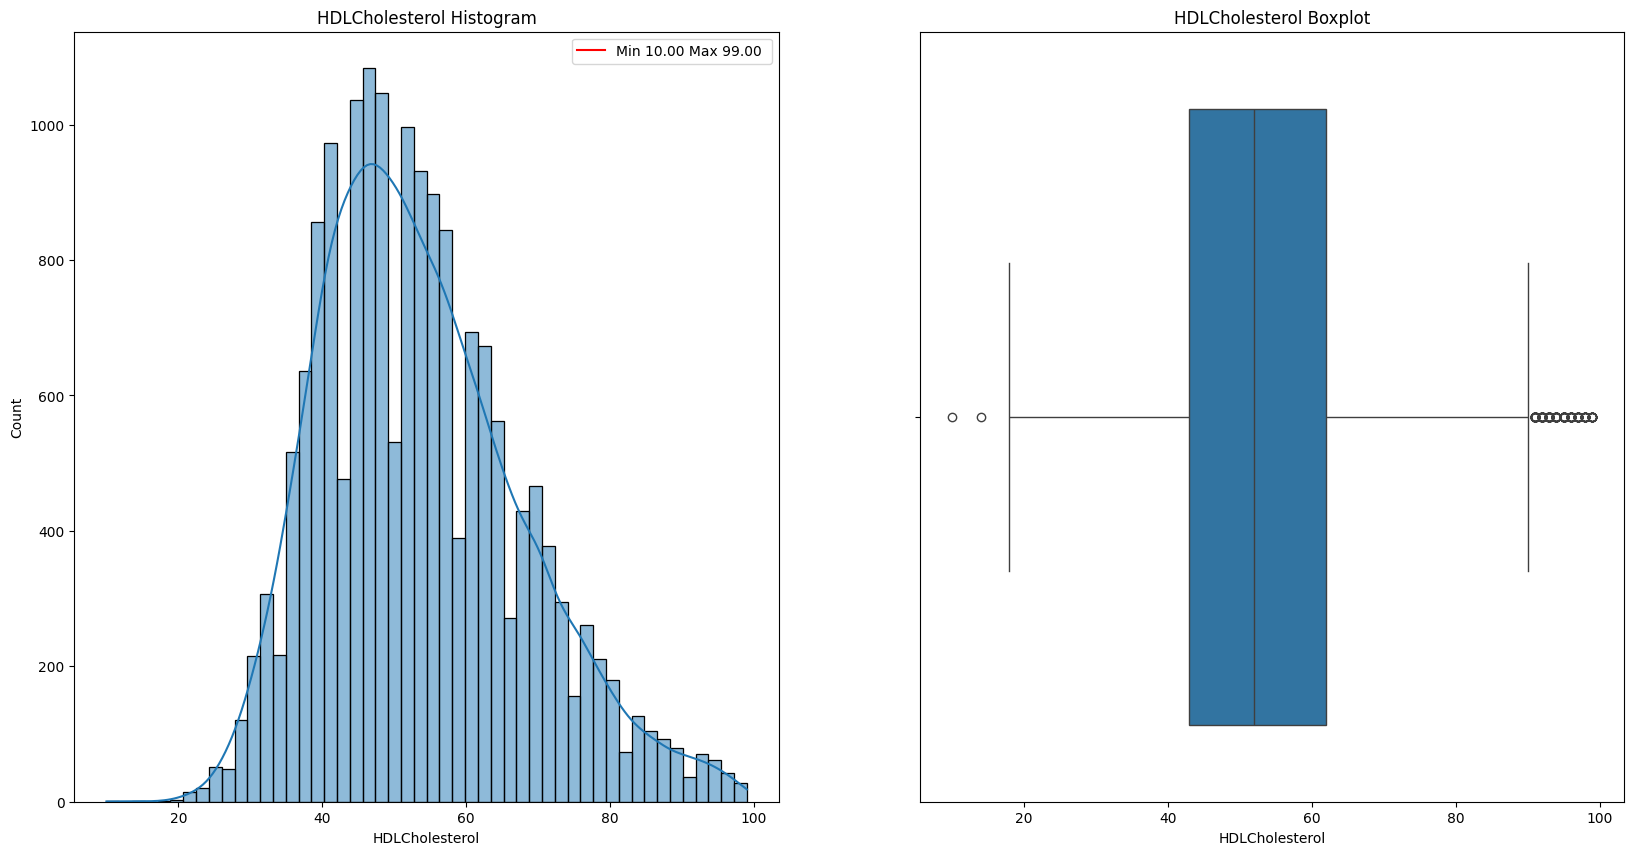

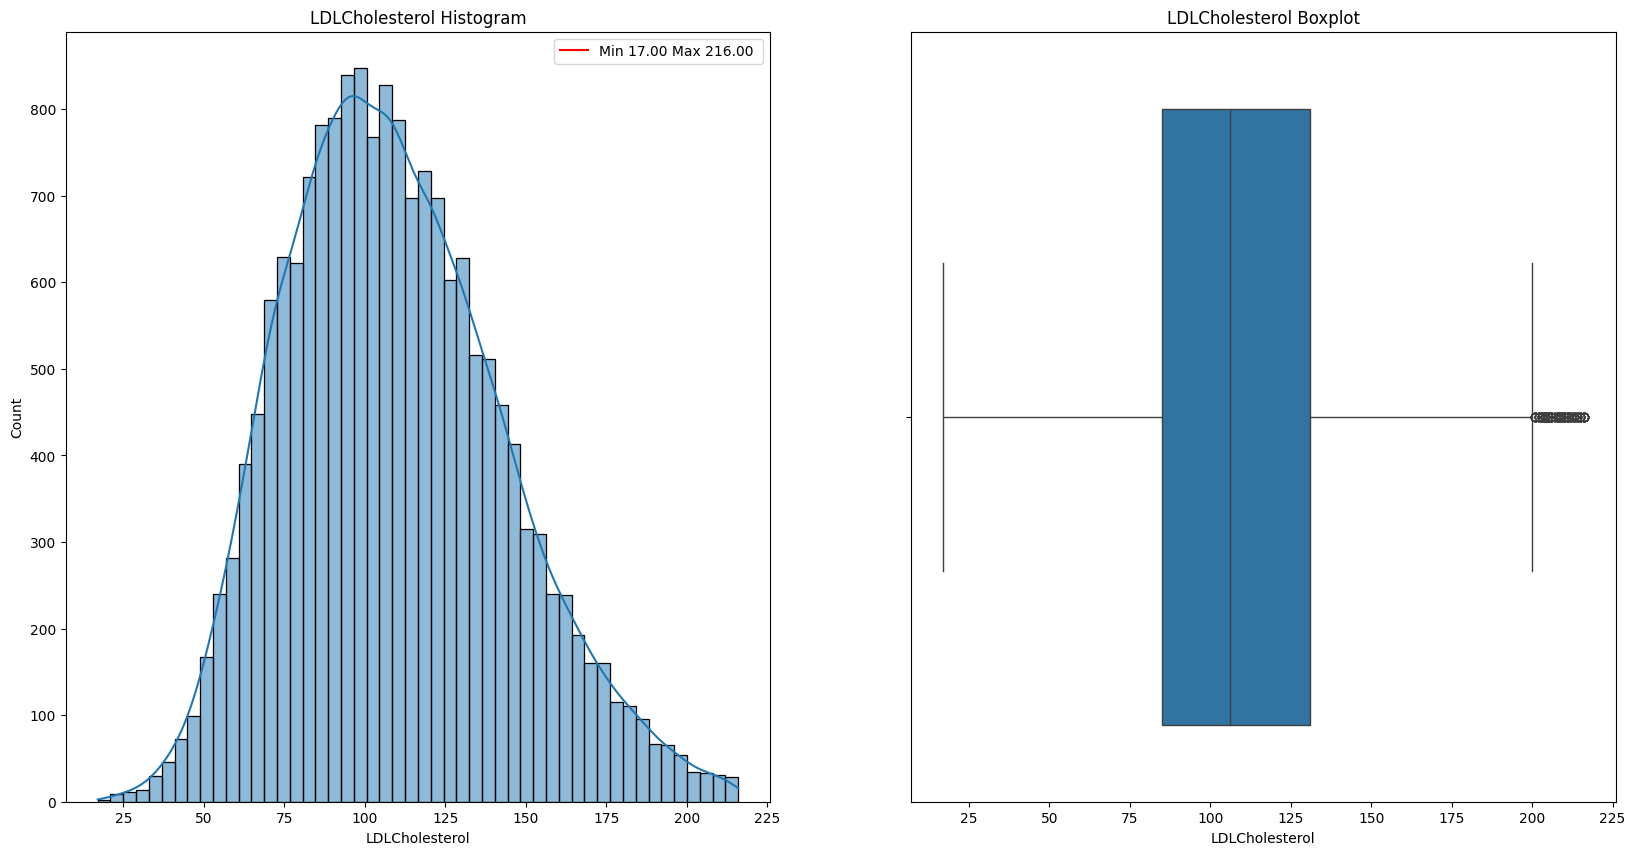

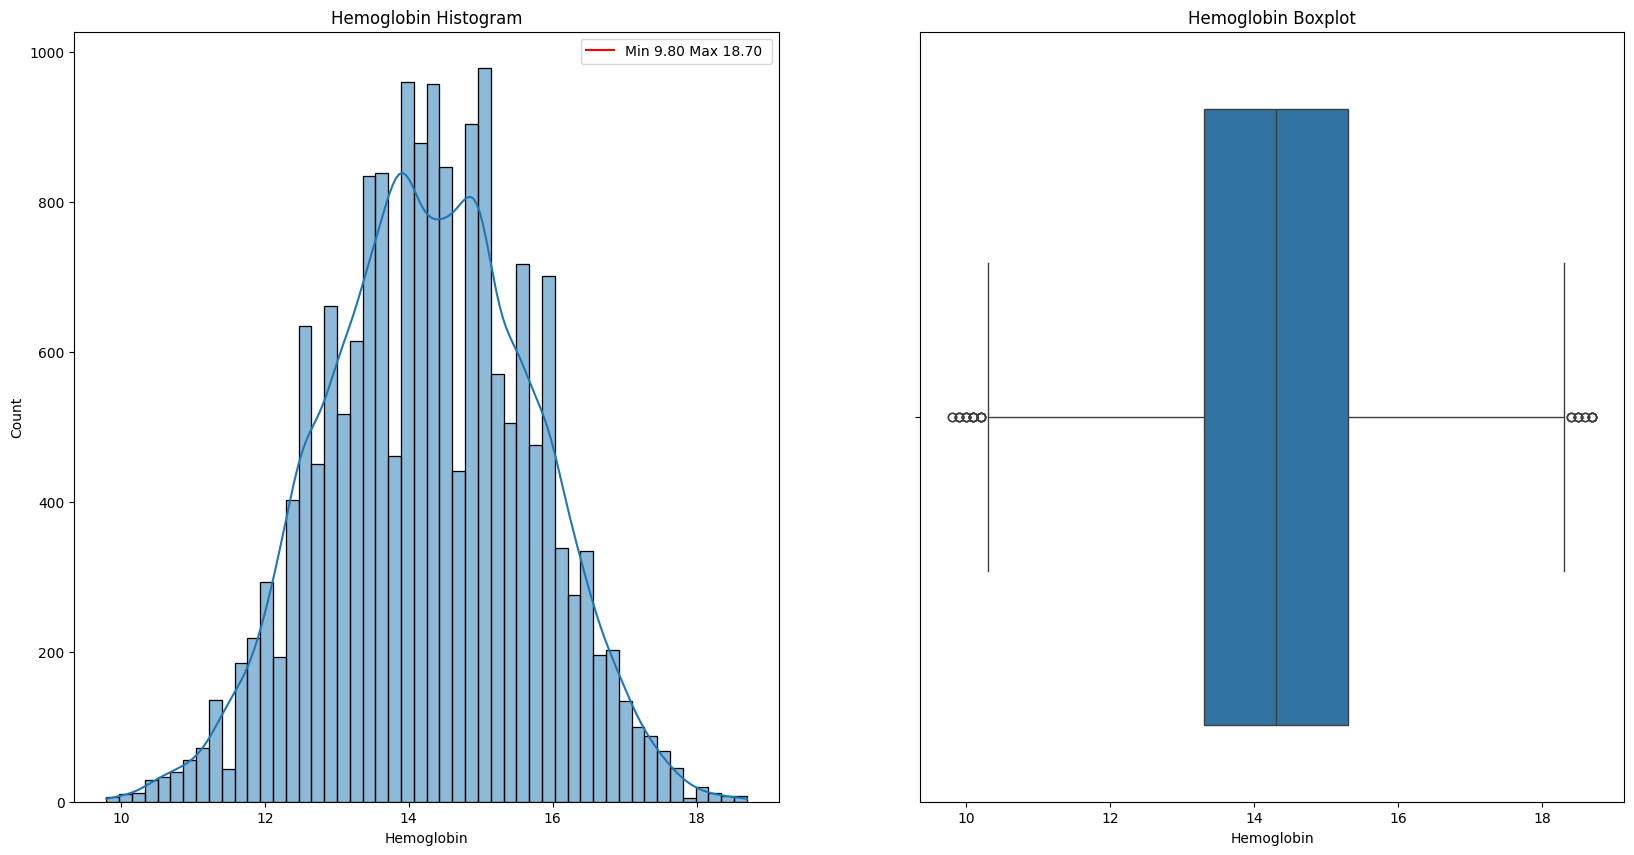

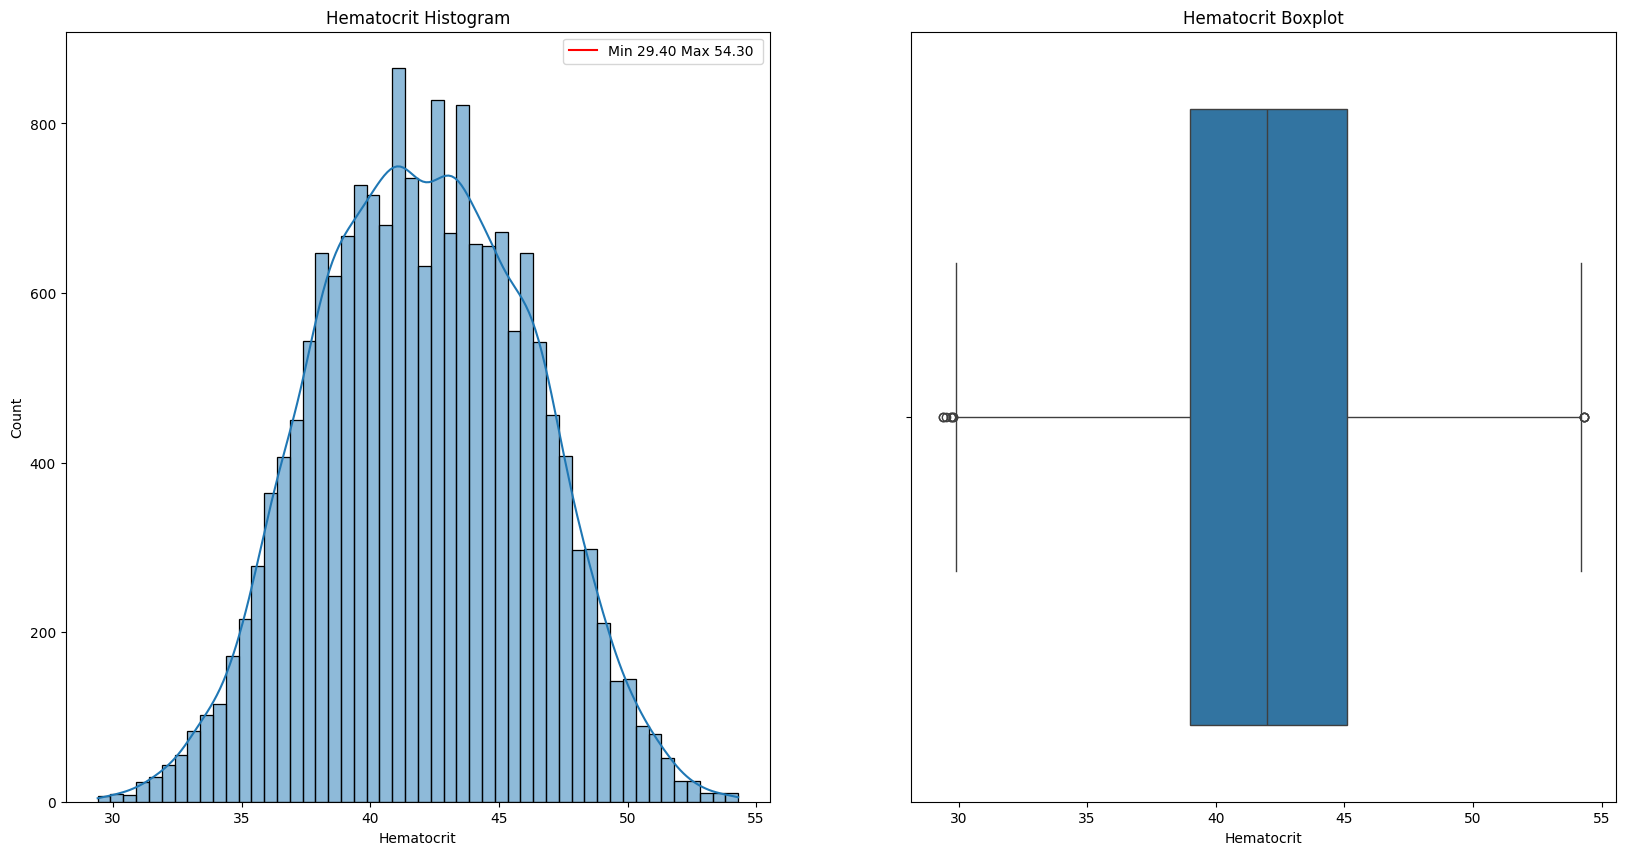

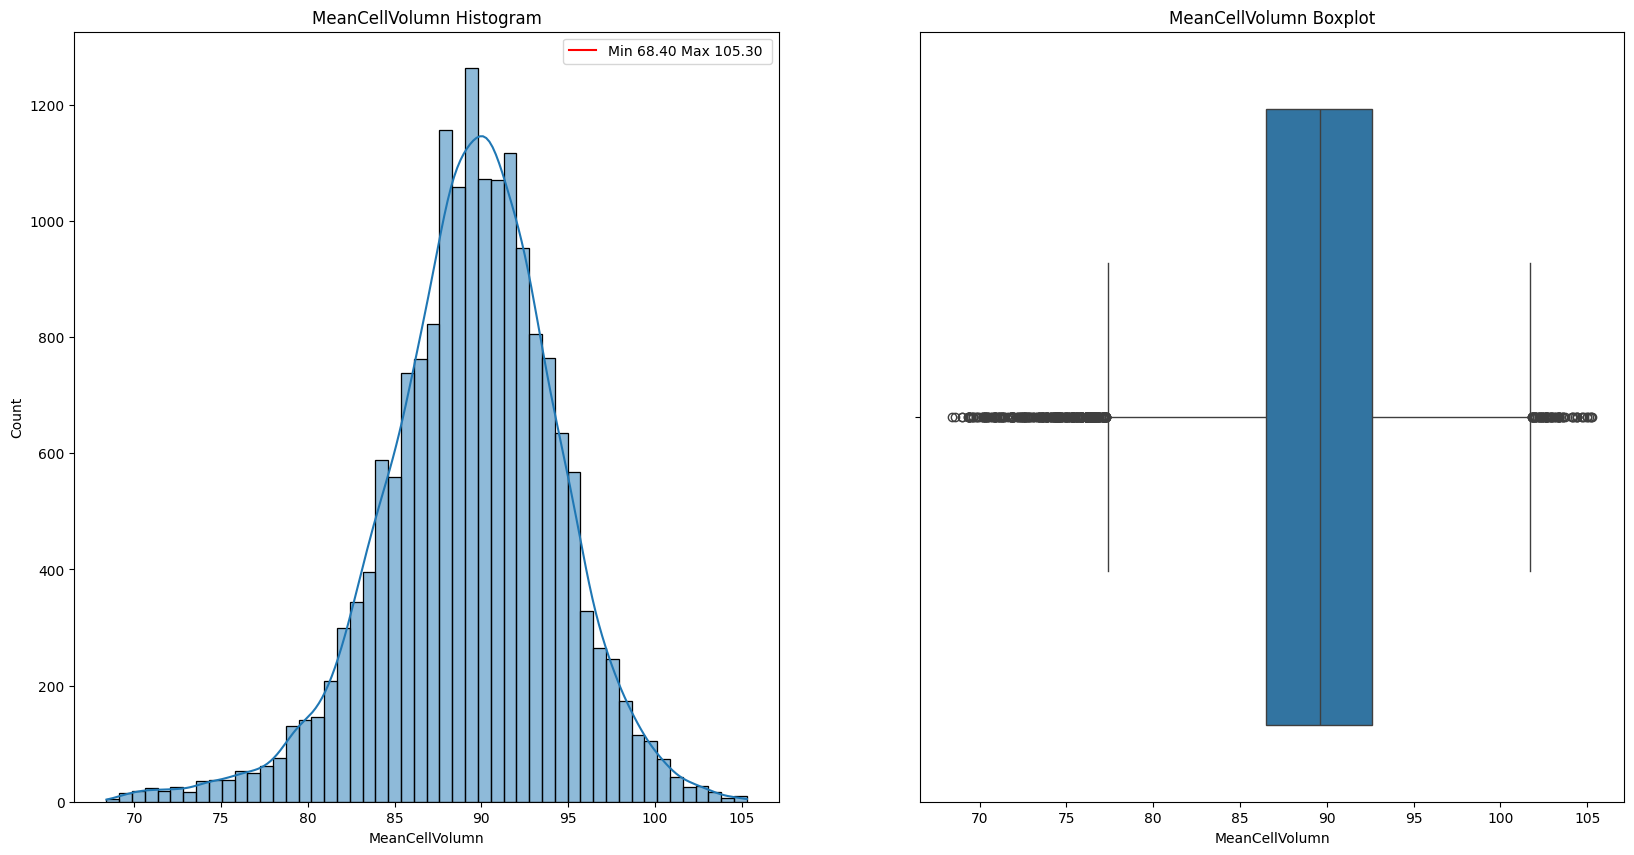

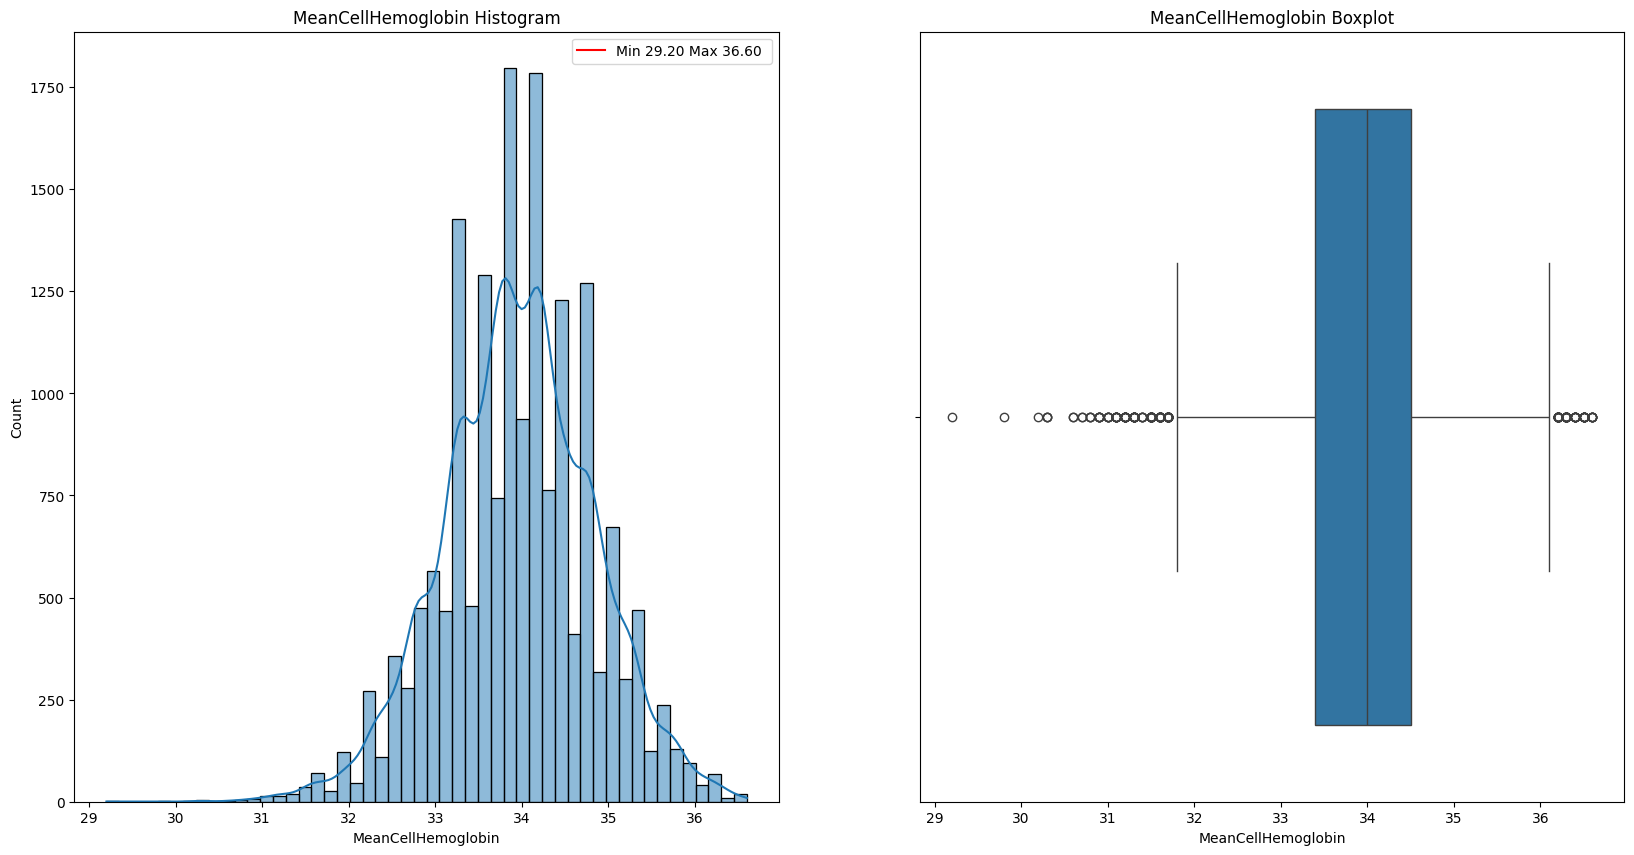

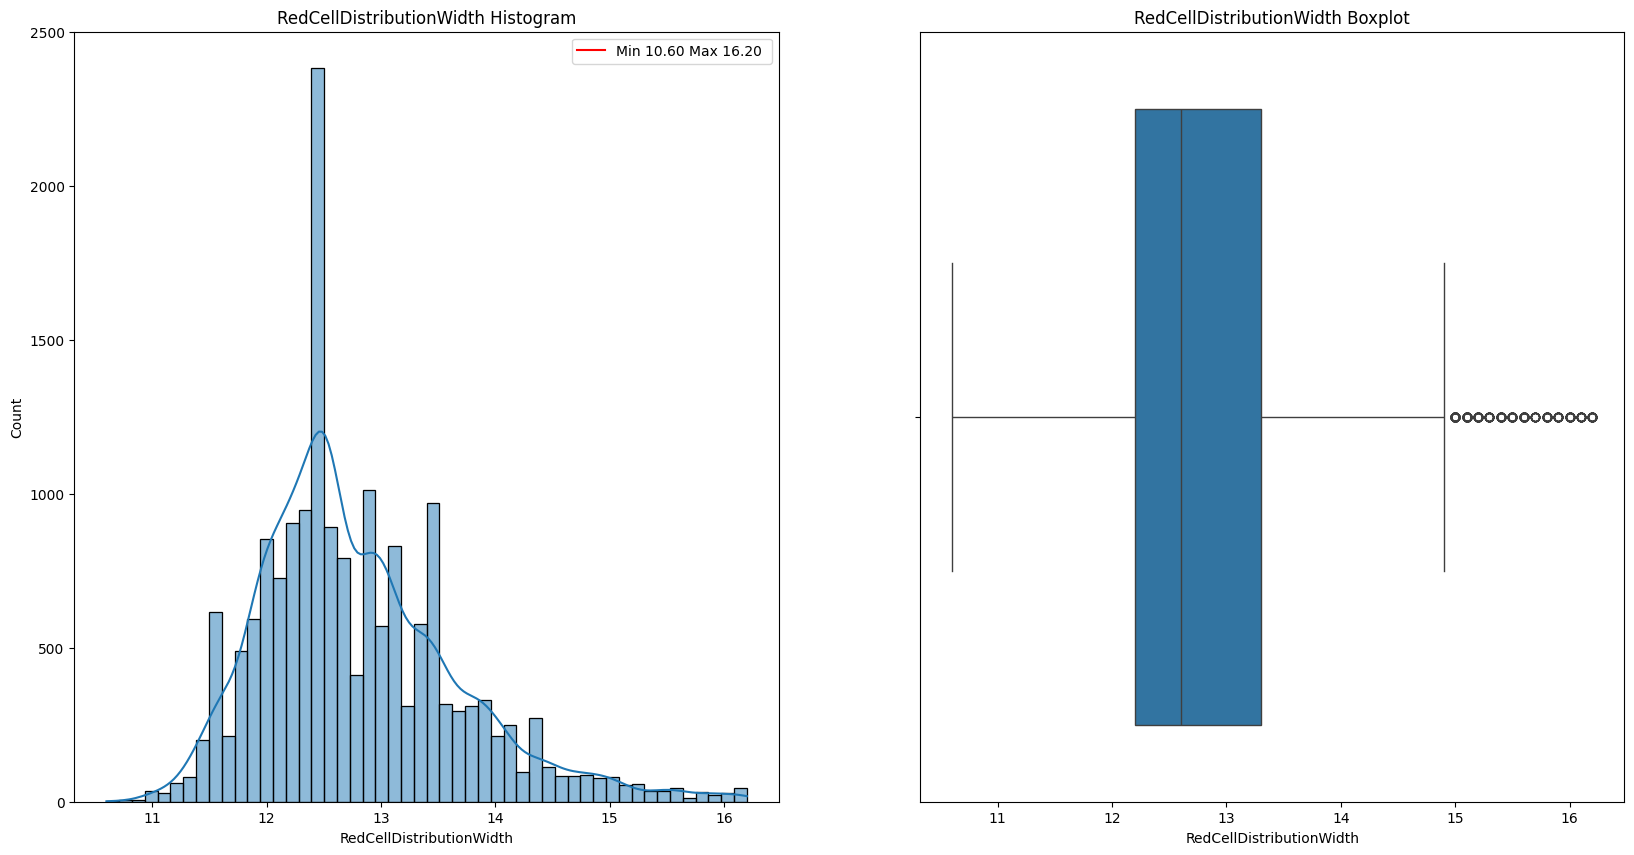

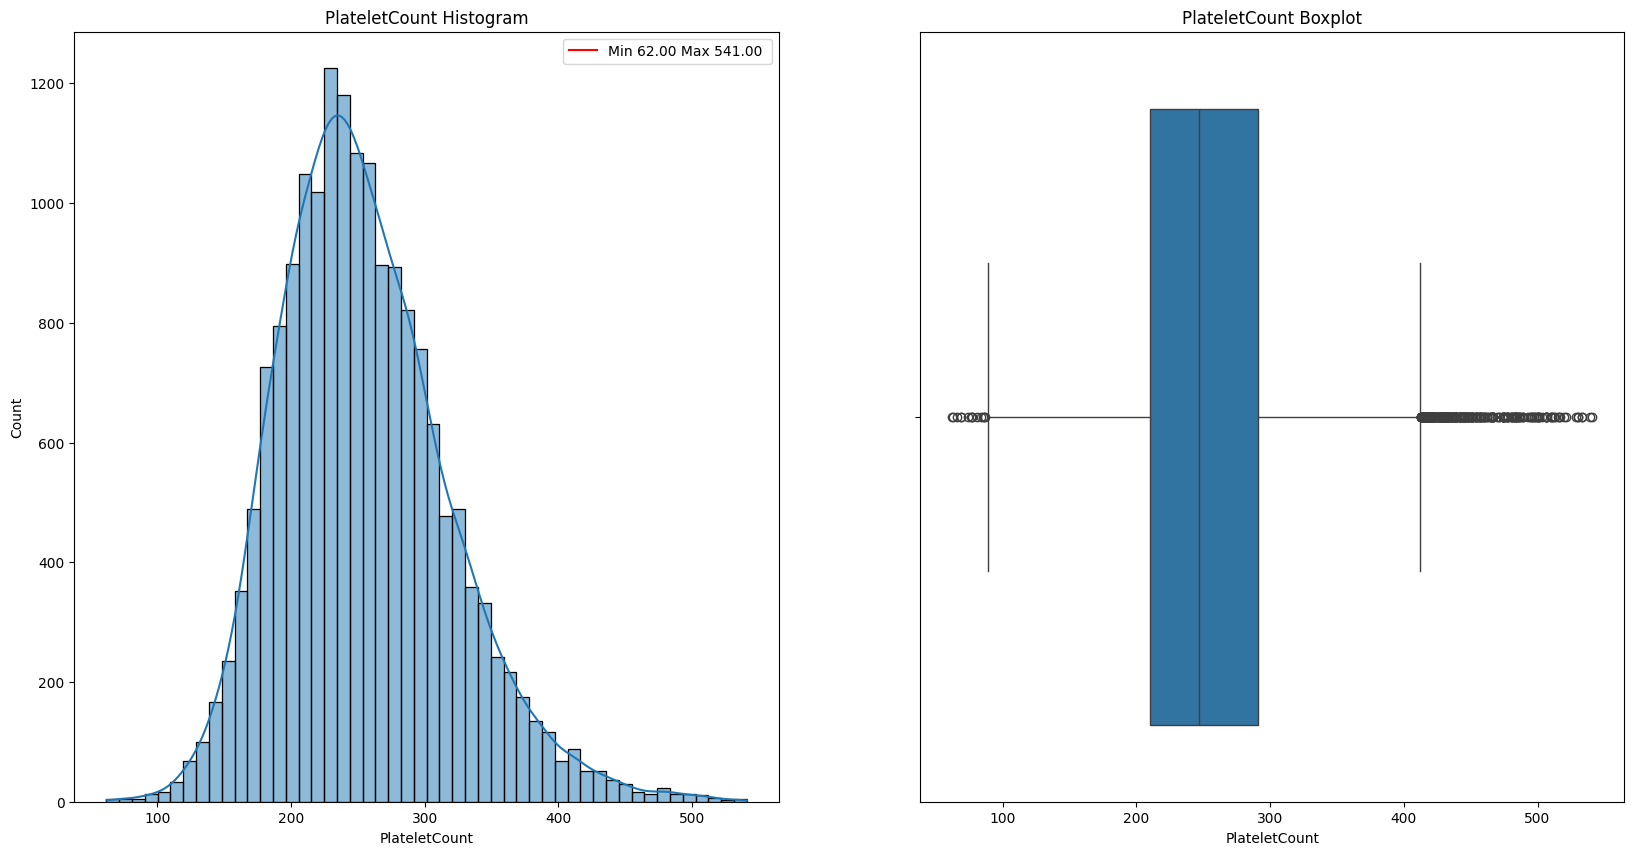

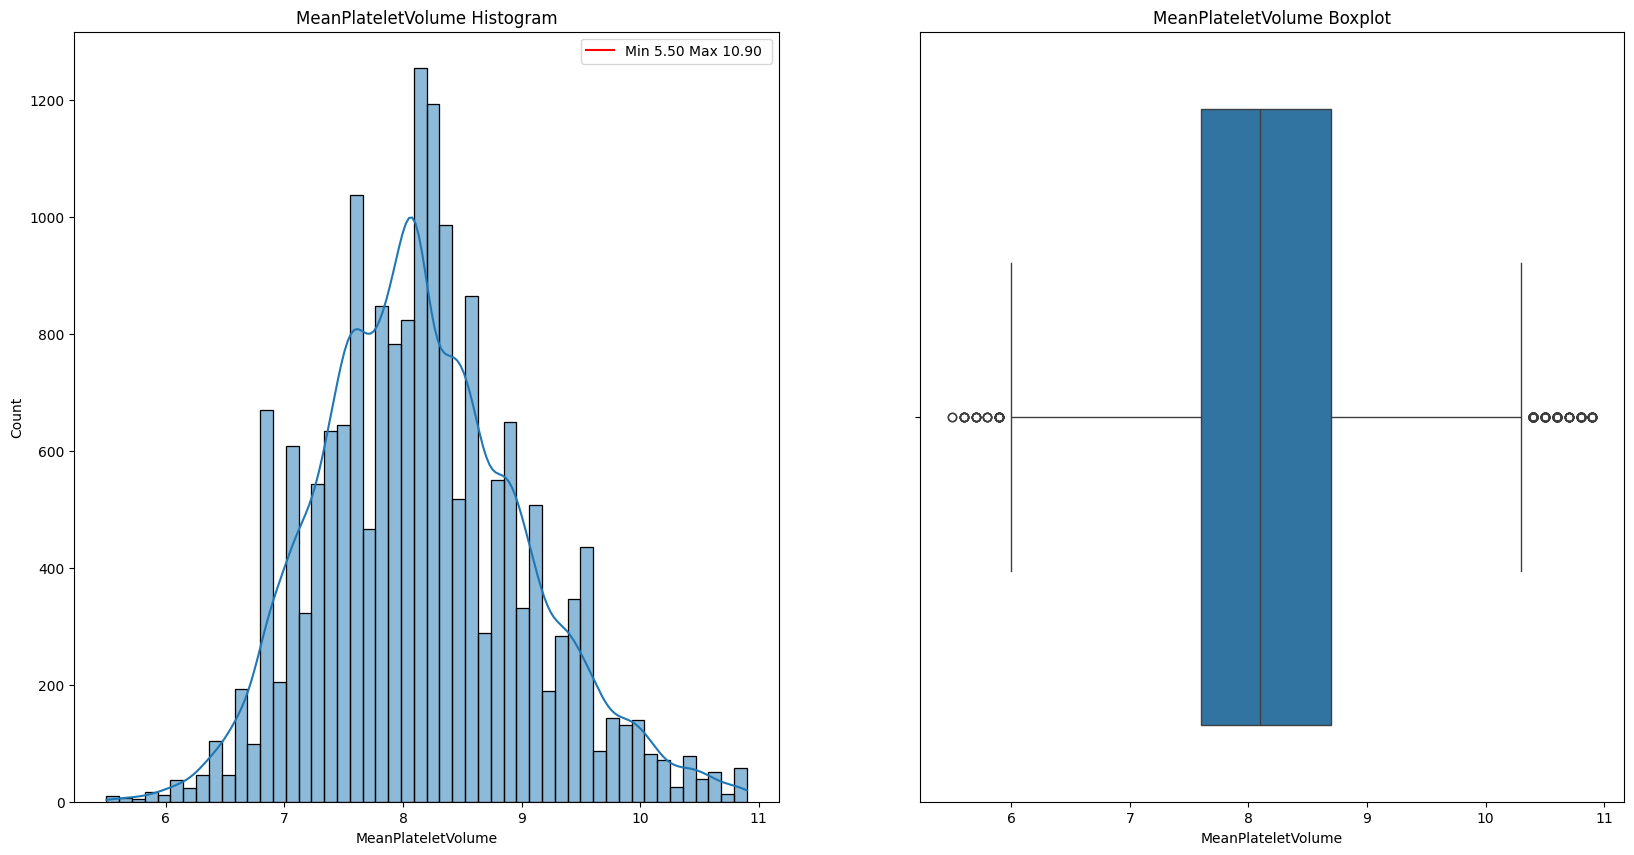

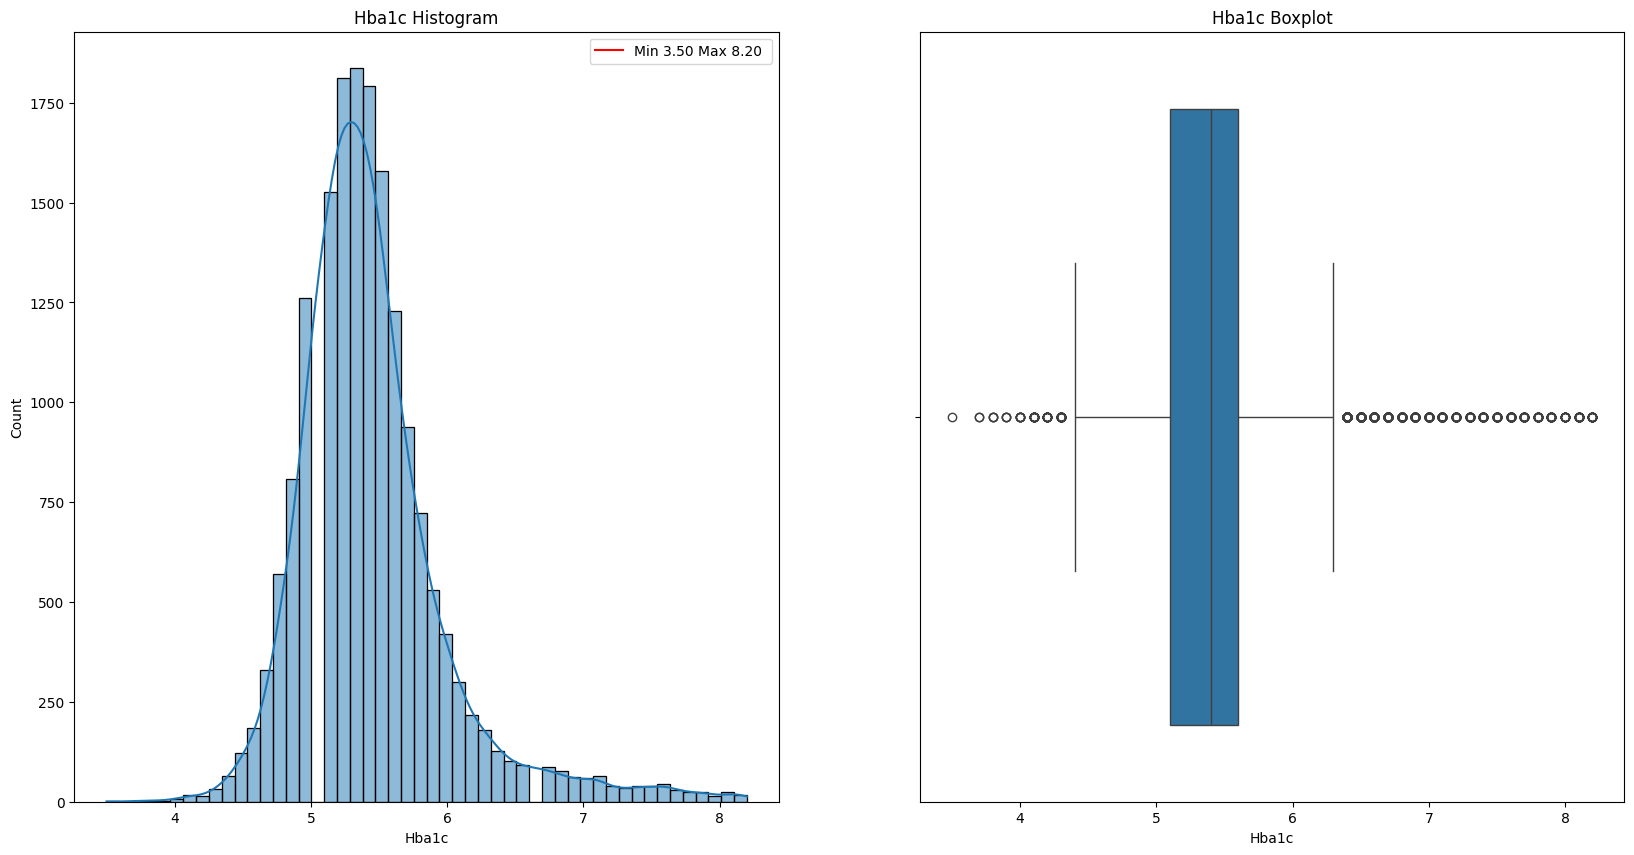

In [76]:
df_scaled = df_train.copy()
df_scaled.drop(columns=category_columns, inplace=True)

for col in df_scaled.columns:
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.histplot(df_scaled[col], bins=50, kde=True)
    plt.plot([], [], label = f"Min {df_scaled[col].min():.2f} Max {df_scaled[col].max():.2f} ", color='red')
    plt.legend()
    plt.title(f"{col} Histogram")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_scaled[col])
    plt.title(f"{col} Boxplot")

    plt.show()

In [53]:
# Import metrics and  standard scaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

In [54]:
df_train.columns

Index(['Gender', 'Age', 'BMI', 'WaistCircumference', 'ALT', 'AST',
       'AlkalinePhosphotase', 'Triglycerides', 'UricAcid', 'Creatinine',
       'HDLCholesterol', 'LDLCholesterol', 'Hemoglobin', 'Hematocrit',
       'MeanCellVolumn', 'MeanCellHemoglobin', 'RedCellDistributionWidth',
       'PlateletCount', 'MeanPlateletVolume', 'Hba1c', 'milk_consumption',
       'label', 'Race_1.0', 'Race_3.0', 'Race_4.0', 'Race_5.0'],
      dtype='object')

In [79]:
remove_columns = [
        'WaistCircumference', 'ALT', 'LDLCholesterol', 'Hematocrit', 'RedCellDistributionWidth',  'PlateletCount', 'MeanPlateletVolume'
]

In [80]:
df_train = df_train.drop(columns=remove_columns)

In [81]:
df_test = df_test[df_train.columns]

In [82]:
df_test.describe()

,Gender,Age,BMI,AST,AlkalinePhosphotase,Triglycerides,UricAcid,Creatinine,HDLCholesterol,Hemoglobin,MeanCellVolumn,MeanCellHemoglobin,Hba1c,milk_consumption,label
count,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5.199000e+03,5199.00000
mean,1.514522,0.169665,0.250810,-0.021784,0.194364,0.063024,0.077805,0.017367,0.061630,-0.152771,-0.242421,-0.764708,0.600473,1.766494e+00,0.64397
std,0.499837,0.970689,1.197185,2.579588,1.355242,0.980778,1.087844,1.759619,1.138874,1.072274,1.250754,1.067999,2.020332,1.087595e+00,0.47887
min,1.000000,-1.365261,-2.013652,-2.705206,-1.621656,-1.439311,-3.401588,-2.756657,-3.409600,-5.633940,-7.724262,-10.068698,-2.654686,5.397605e-79,0.00000
25%,1.000000,-0.706062,-0.602481,-1.006826,-0.496267,-0.633604,-0.684413,-0.802795,-0.758654,-0.831552,-0.855887,-1.326261,-0.444885,1.000000e+00,0.00000
50%,2.000000,0.188566,0.078202,-0.389233,-0.129862,-0.194127,-0.005120,-0.198029,-0.113829,-0.125318,-0.155032,-0.751100,0.107565,2.000000e+00,1.00000
75%,2.000000,0.989022,0.908303,0.382758,0.367403,0.494386,0.749651,0.546300,0.674290,0.580915,0.525798,-0.060908,0.844165,3.000000e+00,1.00000
max,2.000000,1.836564,6.320559,124.827700,14.290817,4.713361,9.580468,49.392836,12.352783,3.335226,4.991243,2.814894,21.284818,3.000000e+00,1.00000


In [59]:
df_train.columns

Index(['Gender', 'Age', 'BMI', 'AST', 'AlkalinePhosphotase', 'Triglycerides',
       'UricAcid', 'Creatinine', 'HDLCholesterol', 'Hemoglobin',
       'MeanCellVolumn', 'MeanCellHemoglobin', 'Hba1c', 'milk_consumption',
       'label', 'Race_1.0', 'Race_3.0', 'Race_4.0', 'Race_5.0'],
      dtype='object')

In [85]:
df = pd.concat([df_train,df_test])

In [89]:
df['label'].value_counts()

label
0    14538
1     8161
Name: count, dtype: int64

In [88]:
df["label"] = df["label"].apply(lambda x: 0 if x == 1 else 1)


In [90]:
category_columns = ['Gender','milk_consumption']

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score,
    brier_score_loss
)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# === 2. Features and Label ===
X = df.drop(columns=["label"])
y = df["label"].values

# === 3. Define categorical and numerical features ===
categorical_features = ["Gender","milk_consumption"]
numerical_features = [col for col in X.columns if col not in categorical_features]

# === 4. Preprocessing ===
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
])

# === 5. Models ===
models = {
    # "GBM": GradientBoostingClassifier(),
    # "LR": LogisticRegression(max_iter=1000),
    # "Nnet": MLPClassifier(max_iter=1000),
    # "RF": RandomForestClassifier(),
    "LGBM":  LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

def evaluate_model(name, model, X, y):
    sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    metrics = {
        "AUC": [], "ACC": [], "PPV": [], "NPV": [], "SEN": [],
        "SPE": [], "F1 score": [], "MCC": [], "KAPPA": [], "Brier score": []
    }

    for train_idx, test_idx in sss.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Step 1: Preprocess features
        X_train_transformed = preprocessor.fit_transform(X_train)
        X_test_transformed = preprocessor.transform(X_test)

        # Step 2: Apply SMOTE to training data
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_transformed, y_train)

        # Step 3: Fit model
        model.fit(X_resampled, y_resampled)

        # Step 4: Predict and Evaluate
        y_pred = model.predict(X_test_transformed)
        y_proba = model.predict_proba(X_test_transformed)[:, 1]

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        metrics["AUC"].append(roc_auc_score(y_test, y_proba))
        metrics["ACC"].append(accuracy_score(y_test, y_pred))
        metrics["PPV"].append(precision_score(y_test, y_pred, zero_division=0))
        metrics["NPV"].append(tn / (tn + fn) if (tn + fn) > 0 else 0)
        metrics["SEN"].append(recall_score(y_test, y_pred))  # Sensitivity
        metrics["SPE"].append(tn / (tn + fp) if (tn + fp) > 0 else 0)  # Specificity
        metrics["F1 score"].append(f1_score(y_test, y_pred))
        metrics["MCC"].append(matthews_corrcoef(y_test, y_pred))
        metrics["KAPPA"].append(cohen_kappa_score(y_test, y_pred))
        metrics["Brier score"].append(brier_score_loss(y_test, y_proba))

    return {metric: np.mean(values) for metric, values in metrics.items()}

# === 7. Run All Models ===
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(name, model, X, y)

# === 8. Export Results ===
results_df = pd.DataFrame(results).T
results_df.index.name = "Method"
results_df.to_csv("evaluation_mine_v7.csv")
print(results_df)

Evaluating LGBM...
[LightGBM] [Info] Number of positive: 11630, number of negative: 11630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4099
[LightGBM] [Info] Number of data points in the train set: 23260, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11630, number of negative: 11630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4098
[LightGBM] [Info] Number of data points in the train set: 23260, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 11630, number of negative: 11630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4102
[LightGBM] [Info] Number of data points in the train set: 23260, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11631, number of negative: 11631
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4103
[LightGBM] [Info] Number of data points in the train set: 23262, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 11631, number of negative: 11631
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4091
[LightGBM] [Info] Number of data points in the train set: 23262, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:54:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Evaluating XGBoost...


c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:54:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:54:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:54:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              AUC       ACC       PPV       NPV       SEN       SPE  F1 score  \
Method                                                                          
LGBM     0.738809  0.711177  0.620849  0.748571  0.505208  0.826798  0.557011   
XGBoost  0.720907  0.698445  0.599210  0.739387  0.486828  0.817238  0.537190   

              MCC     KAPPA  Brier score  
Method                                    
LGBM     0.350205  0.346118     0.192731  
XGBoost  0.320866  0.317100     0.200967  


c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:54:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50      1851
           1       0.73      0.80      0.76      3348

    accuracy                           0.68      5199
   macro avg       0.64      0.63      0.63      5199
weighted avg       0.67      0.68      0.67      5199



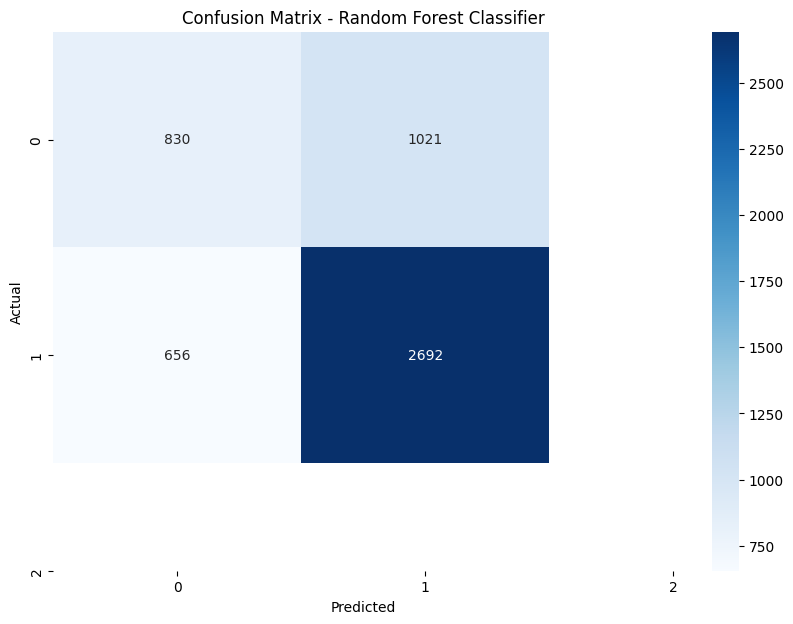

In [84]:
sc = StandardScaler()
for col in df_train.columns:
    if col not in category_columns:
        df_train[col] = sc.fit_transform(df_train[[col]])
        df_test[col] = sc.transform(df_test[[col]])

# Split data into train and test sets
X_train = df_train.drop(columns=['label'])
y_train = df_train['label']
X_test = df_test.drop(columns=['label'])
y_test = df_test['label']

y_train = y_train.astype(int)
y_test = y_test.astype(int)
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
import pandas as pd

In [22]:
df = pd.read_csv(r'C:\mydata\G8Vitamin\data\final\LOCMM_07062025_DATASET_VITAMINd.csv')

In [50]:
df_train = pd.read_csv(r"../../data/final/07062025/processed_train.csv")
df_test = pd.read_csv(r"../../data/final/07062025/processed_test.csv")

In [51]:
df1 = pd.concat([df_train,df_test])

In [43]:
df1.head()

,Gender,Age,BMI,WaistCircumference,ALT,AST,AlkalinePhosphotase,Triglycerides,UricAcid,Creatinine,...,milk_consumption,label,YearStart,Race_1.0,Race_3.0,Race_4.0,Race_5.0,SEQN,FastingGlucose,CreatinineUmol
0,1.0,39.0,30.22,100.8,20.0,24.0,68.0,386.0,5.5,1.0,...,1.0,1.0,2001,False,True,False,False,NaN,NaN,NaN
1,2.0,84.0,24.62,86.1,12.0,19.0,60.0,109.0,6.0,0.8,...,2.0,0.0,2001,False,True,False,False,NaN,NaN,NaN
2,2.0,51.0,22.26,74.0,21.0,25.0,59.0,82.0,3.1,0.9,...,3.0,1.0,2001,False,True,False,False,NaN,NaN,NaN
3,1.0,44.0,33.84,116.0,65.0,49.0,68.0,167.0,8.6,0.9,...,3.0,1.0,2001,False,True,False,False,NaN,NaN,NaN
4,2.0,63.0,26.60,94.2,11.0,15.0,46.0,230.0,6.7,0.7,...,3.0,1.0,2001,True,False,False,False,NaN,NaN,NaN


In [ ]:
def binary_vitamin_d_label(row):
    val = row['VitaminD']
    year = row['YearStart']

    if pd.isna(val) or pd.isna(year):
        return None  # hoặc np.nan

    if year in [2001, 2003]:
        return 1 if val < 20 else 0
    else:
        return 1 if val < 50 else 0

df1['label'] = df1.apply(binary_vitamin_d_label, axis=1)


In [53]:
df1['label'].value_counts()

label
0    15075
1     7717
Name: count, dtype: int64

In [54]:
remove_columns = [
    'SEQN', 'FastingGlucose', 'CreatinineUmol','VitaminD', 'Gender'
]

In [55]:
df1.drop(columns=remove_columns,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22792 entries, 0 to 5213
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    22792 non-null  float64
 1   Age                       22792 non-null  float64
 2   BMI                       22792 non-null  float64
 3   WaistCircumference        22792 non-null  float64
 4   ALT                       22792 non-null  float64
 5   AST                       22792 non-null  float64
 6   AlkalinePhosphotase       22792 non-null  float64
 7   Triglycerides             22792 non-null  float64
 8   UricAcid                  22792 non-null  float64
 9   Creatinine                22792 non-null  float64
 10  HDLCholesterol            22792 non-null  float64
 11  LDLCholesterol            22792 non-null  float64
 12  Hemoglobin                22792 non-null  float64
 13  Hematocrit                22792 non-null  float64
 14  MeanCellVolu

In [48]:
print(df1.isnull().sum())


Gender                      0
Age                         0
BMI                         0
WaistCircumference          0
ALT                         0
AST                         0
AlkalinePhosphotase         0
Triglycerides               0
UricAcid                    0
Creatinine                  0
HDLCholesterol              0
LDLCholesterol              0
Hemoglobin                  0
Hematocrit                  0
MeanCellVolumn              0
MeanCellHemoglobin          0
RedCellDistributionWidth    0
PlateletCount               0
MeanPlateletVolume          0
Hba1c                       0
milk_consumption            0
label                       0
YearStart                   0
Race_1.0                    0
Race_3.0                    0
Race_4.0                    0
Race_5.0                    0
dtype: int64


In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score,
    brier_score_loss
)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

df = df1.copy()
# === 2. Features and Label ===
X = df.drop(columns=["label"])
y = df["label"].values

# === 3. Define categorical and numerical features ===
categorical_features = ["milk_consumption"]
numerical_features = [col for col in X.columns if col not in categorical_features]

# === 4. Preprocessing ===
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
])

# === 5. Models ===
models = {
    # "GBM": GradientBoostingClassifier(),
    # "LR": LogisticRegression(max_iter=1000),
    # "Nnet": MLPClassifier(max_iter=1000),
    # "RF": RandomForestClassifier(),
    "LGBM":  LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

def evaluate_model(name, model, X, y):
    sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    metrics = {
        "AUC": [], "ACC": [], "PPV": [], "NPV": [], "SEN": [],
        "SPE": [], "F1 score": [], "MCC": [], "KAPPA": [], "Brier score": []
    }

    for train_idx, test_idx in sss.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Step 1: Preprocess features
        X_train_transformed = preprocessor.fit_transform(X_train)
        X_test_transformed = preprocessor.transform(X_test)

        # Step 2: Apply SMOTE to training data
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_transformed, y_train)

        # Step 3: Fit model
        model.fit(X_resampled, y_resampled)

        # Step 4: Predict and Evaluate
        y_pred = model.predict(X_test_transformed)
        y_proba = model.predict_proba(X_test_transformed)[:, 1]

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        metrics["AUC"].append(roc_auc_score(y_test, y_proba))
        metrics["ACC"].append(accuracy_score(y_test, y_pred))
        metrics["PPV"].append(precision_score(y_test, y_pred, zero_division=0))
        metrics["NPV"].append(tn / (tn + fn) if (tn + fn) > 0 else 0)
        metrics["SEN"].append(recall_score(y_test, y_pred))  # Sensitivity
        metrics["SPE"].append(tn / (tn + fp) if (tn + fp) > 0 else 0)  # Specificity
        metrics["F1 score"].append(f1_score(y_test, y_pred))
        metrics["MCC"].append(matthews_corrcoef(y_test, y_pred))
        metrics["KAPPA"].append(cohen_kappa_score(y_test, y_pred))
        metrics["Brier score"].append(brier_score_loss(y_test, y_proba))

    return {metric: np.mean(values) for metric, values in metrics.items()}

# === 7. Run All Models ===
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(name, model, X, y)

# === 8. Export Results ===
results_df = pd.DataFrame(results).T
results_df.index.name = "Method"
results_df.to_csv("evaluation_mine_v8.csv")
print(results_df)

Evaluating LGBM...
[LightGBM] [Info] Number of positive: 12060, number of negative: 12060
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5919
[LightGBM] [Info] Number of data points in the train set: 24120, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12060, number of negative: 12060
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5909
[LightGBM] [Info] Number of data points in the train set: 24120, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 12060, number of negative: 12060
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5925
[LightGBM] [Info] Number of data points in the train set: 24120, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12060, number of negative: 12060
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5915
[LightGBM] [Info] Number of data points in the train set: 24120, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12060, number of negative: 12060
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5917
[LightGBM] [Info] Number of data points in the train set: 24120, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Evaluating XGBoost...


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:33:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:33:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:33:03] WAR

              AUC       ACC       PPV       NPV       SEN       SPE  F1 score  \
Method                                                                          
LGBM     0.779248  0.740172  0.638347  0.780785  0.536732  0.844312  0.582980   
XGBoost  0.758172  0.726746  0.614004  0.772150  0.520019  0.832570  0.563033   

              MCC     KAPPA  Brier score  
Method                                    
LGBM     0.399614  0.396376     0.175285  
XGBoost  0.368981  0.366254     0.185636  


c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:33:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
